In [ ]:
"""3. Design a time series analysis and prediction system using a Recurrent Neural Network (RNN) 
on the Google stock prices dataset.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [3]:
# Step 1: Load and clean training data
df_train = pd.read_csv('Google_Stock_Train.csv')
# Convert 'Open' to float if it's a string with commas
if df_train['Open'].dtype == 'object':
    df_train['Open'] = df_train['Open'].str.replace(',', '').astype(float)

In [4]:
# Step 2: Scale training data
training_set = df_train['Open'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)


In [5]:

# Step 3: Create sequences for RNN
X_train, y_train = [], []
time_step = 60
for i in range(time_step, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-time_step:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))


In [6]:
# Step 4: Build and train the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0450
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8897e-04
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6416e-04
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.0079e-04
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.5993e-04
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.9964e-04
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.2027e-04
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8254e-04
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8144e-04
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.4779e-04
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1498e-04
Epoch 12/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9399e-04
Epoch 13/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9989e-04
Epoch 14/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.9148e-04
Epoch 15/20
101/

In [7]:
# Step 5: Load and clean test data
df_test = pd.read_csv('Google_Stock_Test.csv')
if df_test['Open'].dtype == 'object':
    df_test['Open'] = df_test['Open'].str.replace(',', '').astype(float)
real_stock_price = df_test['Open'].values.reshape(-1, 1)

In [8]:
# Step 6: Prepare test input
total_data = pd.concat((df_train['Open'], df_test['Open']), axis=0)
inputs = total_data[len(total_data) - len(df_test) - time_step:].values
inputs = inputs.reshape(-1, 1)
inputs_scaled = scaler.transform(inputs)

X_test = []
for i in range(time_step, len(inputs_scaled)):
    X_test.append(inputs_scaled[i-time_step:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [9]:
# Step 7: Predict
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


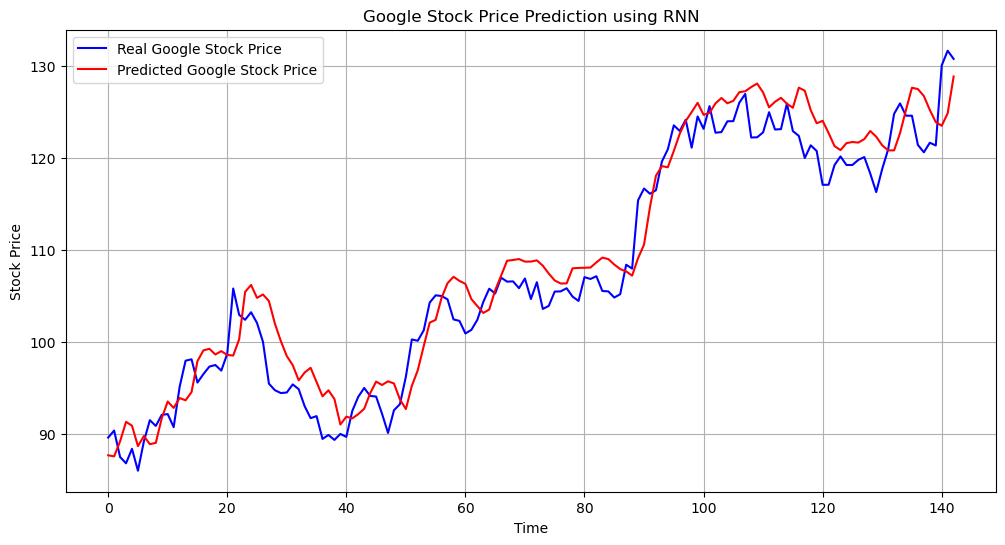

In [10]:
# Step 8: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='blue', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
